<a href="https://colab.research.google.com/github/nameera-khan/Football_Analysis/blob/main/Football_player_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Player Role Clustering**

In [1]:
# Install Kaggle API
!pip install kaggle

# Set up Kaggle credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d hugomathien/soccer

# Unzip dataset
!unzip soccer.zip -d ./soccer

# Verify files
import os
print(os.listdir('./soccer'))

# SQLite file path
database_path = './soccer/database.sqlite'
print("Database file path:", database_path)

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/hugomathien/soccer
License(s): ODbL-1.0
 95% 31.0M/32.7M [00:00<00:00, 103MB/s]
100% 32.7M/32.7M [00:00<00:00, 99.2MB/s]
Archive:  soccer.zip
  inflating: ./soccer/database.sqlite  
['database.sqlite']
Database file path: ./soccer/database.sqlite


In [2]:
import sqlite3
import pandas as pd
conn = sqlite3.connect(database_path)

In [3]:
query = "SELECT * FROM Player_Attributes;"
df = pd.read_sql_query(query, conn)
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [4]:
df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [5]:
#check average scores for players playing with left vs right foot
left_avg = df[df['preferred_foot']=='left']['overall_rating'].mean()
right_avg = df[df['preferred_foot']=='right']['overall_rating'].mean()
print(f'Average left foot player rating: {left_avg}')
print(f'Average right foot player rating: {right_avg}')

Average left foot player rating: 68.6261820132788
Average right foot player rating: 68.59155835241928


In [6]:
df.player_api_id.value_counts()

,count
player_api_id,
41269,56
210278,56
42116,55
26472,54
179795,53
...,...
33688,2
470720,2
37366,2


In [7]:
query_2 = "SELECT * FROM Player;"
df_player = pd.read_sql_query(query_2, conn)
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [8]:
#to create a join between player attributes and player data
#convert birthdate into birth year
df_player['birth_year'] = pd.to_datetime(df_player['birthday']).dt.year
df_player

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,birth_year
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1992
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,1989
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163,1991
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198,1982
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154,1979
...,...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168,1979
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176,1986
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154,1979
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172,1981


In [9]:
list_of_columns = ['player_name','height','weight','birth_year','overall_rating','potential','preferred_foot','crossing','finishing','heading_accuracy','free_kick_accuracy','ball_control',
                   'acceleration','sprint_speed','shot_power','jumping','strength']
merged_df = pd.merge(df, df_player, on=['player_api_id'], how='inner')
merged_df

,id_x,player_fifa_api_id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_kicking,gk_positioning,gk_reflexes,id_y,player_name,player_fifa_api_id_y,birthday,height,weight,birth_year
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1992
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1992
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1992
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,9.0,7.0,7.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1992
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,9.0,7.0,7.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,84.0,20.0,20.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,1982
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,73.0,20.0,20.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,1982
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,73.0,20.0,20.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,1982
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,73.0,20.0,20.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,1982


In [10]:
grouped = merged_df.groupby('player_api_id')
print(grouped.size())

player_api_id
2625      14
2752      21
2768      21
2770      15
2790       5
          ..
744907    11
746419     2
748432     2
750435     9
750584     2
Length: 11060, dtype: int64


In [11]:

grouped.player_api_id.count()

,player_api_id
player_api_id,
2625,14
2752,21
2768,21
2770,15
2790,5
...,...
744907,11
746419,2
748432,2


In [12]:

grouped_df = (
    merged_df.groupby('player_api_id', as_index=False)
    .agg({
        'player_name': 'first',  # Take the first name
        'height': 'first',  # Assume height is constant for each player
        'weight': 'first',  # Assume weight is constant for each player
        'overall_rating': 'mean',  # Average overall_rating
        'potential': 'mean',  # Average potential
        'preferred_foot': 'first',  # Take the first preferred foot value
        'crossing': 'mean',  # Average crossing
        'finishing': 'mean',  # Average finishing
        'heading_accuracy': 'mean',  # Average heading_accuracy
        'free_kick_accuracy': 'mean',  # Average free_kick_accuracy
        'ball_control': 'mean',  # Average ball_control
        'acceleration': 'mean',  # Average acceleration
        'sprint_speed': 'mean',  # Average sprint_speed
        'shot_power': 'mean',  # Average shot_power
        'jumping': 'mean',  # Average jumping
        'strength': 'mean',  # Average strength
    })
)


In [13]:
# Resulting DataFrame is equivalent to the SQL view
grouped_df.head()

,player_api_id,player_name,height,weight,overall_rating,potential,preferred_foot,crossing,finishing,heading_accuracy,free_kick_accuracy,ball_control,acceleration,sprint_speed,shot_power,jumping,strength
0,2625,"Patryk Rachwal,18",175.26,154,60.142857,61.142857,right,50.142857,47.285714,46.285714,49.928571,59.142857,66.857143,63.285714,66.714286,58.714286,55.785714
1,2752,Diego Mainz,187.96,174,69.380952,70.380952,right,36.428571,37.428571,75.333333,18.857143,55.571429,41.619048,42.190476,57.428571,56.523810,82.238095
2,2768,Jose Dorado,180.34,154,69.285714,70.571429,left,42.238095,42.761905,66.666667,20.047619,56.380952,56.952381,58.904762,38.761905,76.904762,67.428571
3,2770,Ignacio Gonzalez,180.34,161,71.133333,73.533333,right,61.866667,67.666667,67.800000,68.666667,76.733333,62.200000,59.800000,68.333333,57.133333,62.600000
4,2790,Alberto Rey,175.26,163,70.200000,75.800000,left,70.000000,37.400000,55.200000,55.400000,66.800000,70.800000,71.200000,46.400000,61.000000,71.000000


In [14]:
grouped_df.describe()

,player_api_id,height,weight,overall_rating,potential,crossing,finishing,heading_accuracy,free_kick_accuracy,ball_control,acceleration,sprint_speed,shot_power,jumping,strength
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,10582.000000,11060.000000
mean,156582.427215,181.867445,168.380289,66.821220,72.090199,52.853836,47.862158,56.100191,47.342793,61.137183,66.385536,66.779640,59.478135,66.038401,66.641511
std,160713.700624,6.369201,14.990217,6.237737,5.800310,16.169993,18.109541,15.655452,16.311365,14.569399,11.617063,11.242891,15.252962,9.555293,10.997837
min,2625.000000,157.480000,117.000000,43.000000,51.000000,6.000000,5.000000,8.000000,6.000000,9.000000,15.000000,17.000000,9.923077,21.000000,21.500000
25%,35555.500000,177.800000,159.000000,62.822193,68.000000,43.444444,32.444444,49.093168,35.543706,56.922308,60.000000,61.000000,52.000000,60.000000,60.088182
50%,96619.500000,182.880000,168.000000,66.722222,72.000000,56.296296,49.854111,58.803226,48.000000,64.285714,67.809524,68.101724,62.875000,66.888889,67.823529
75%,212470.500000,185.420000,179.000000,70.951630,76.000000,64.714286,63.055556,66.750000,59.687071,70.348370,74.357857,74.500000,70.388889,72.363636,74.263545
max,750584.000000,208.280000,243.000000,92.192308,95.230769,89.357143,92.230769,93.111111,90.488889,95.769231,95.787879,95.696970,93.076923,94.311111,95.000000


In [15]:
grouped_df.dropna(inplace=True)

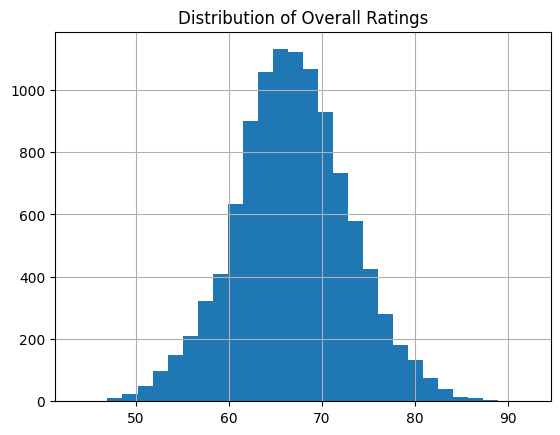

In [16]:
import matplotlib.pyplot as plt

grouped_df['overall_rating'].hist(bins=30)
plt.title('Distribution of Overall Ratings')
plt.show()

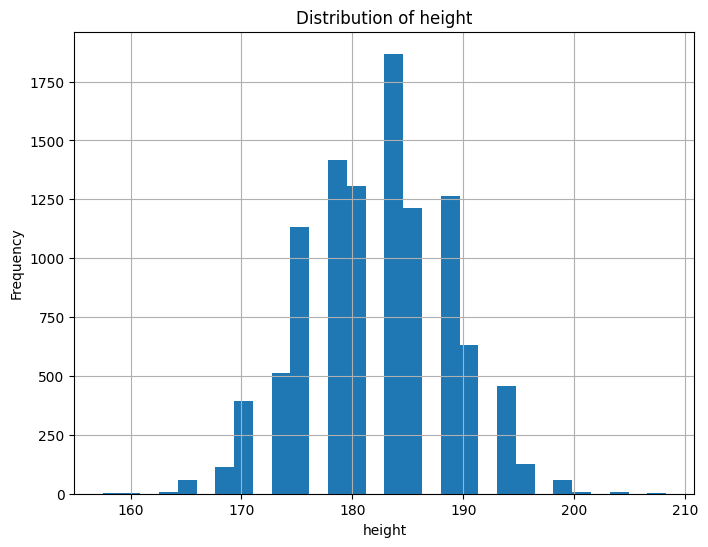

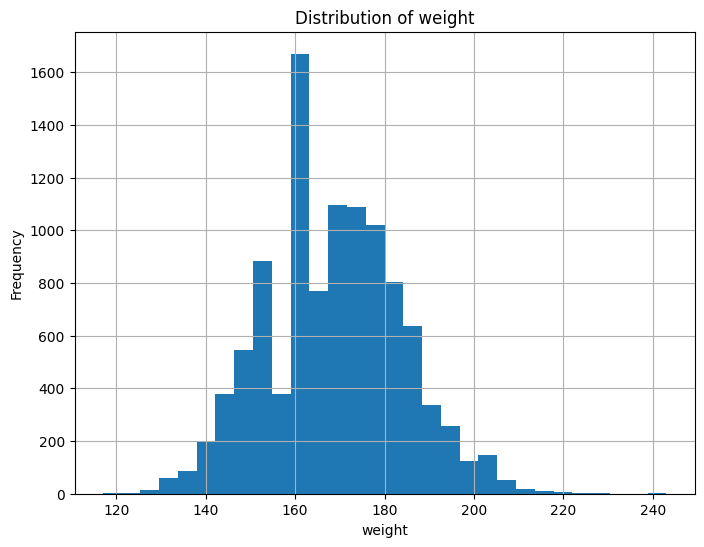

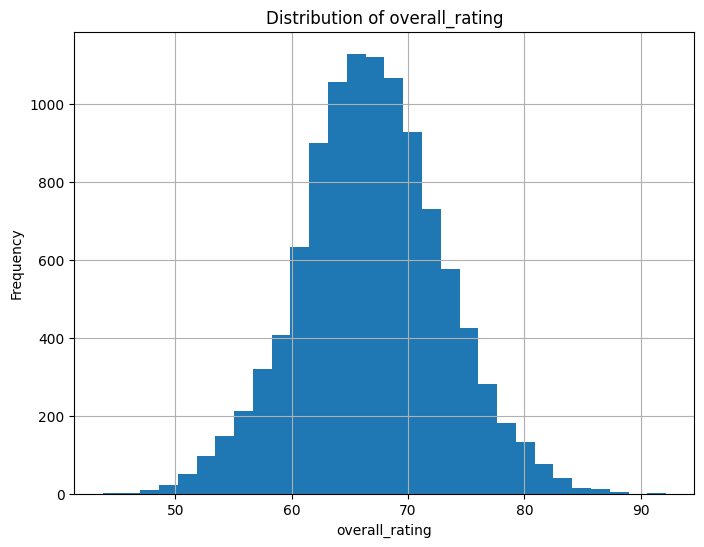

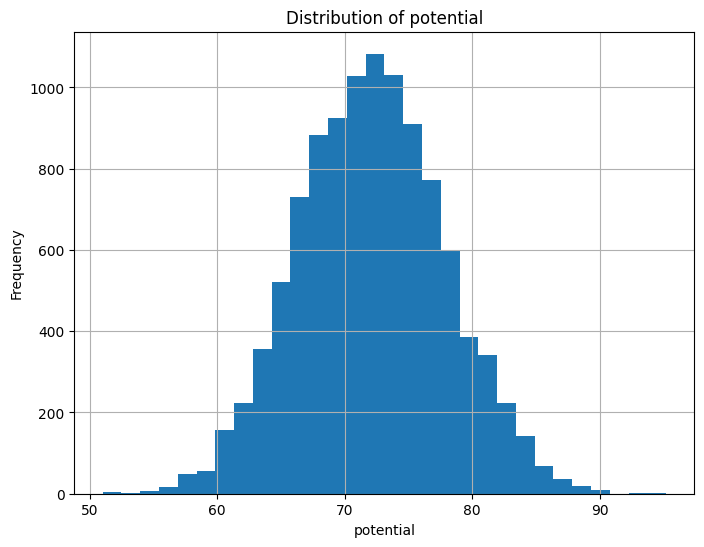

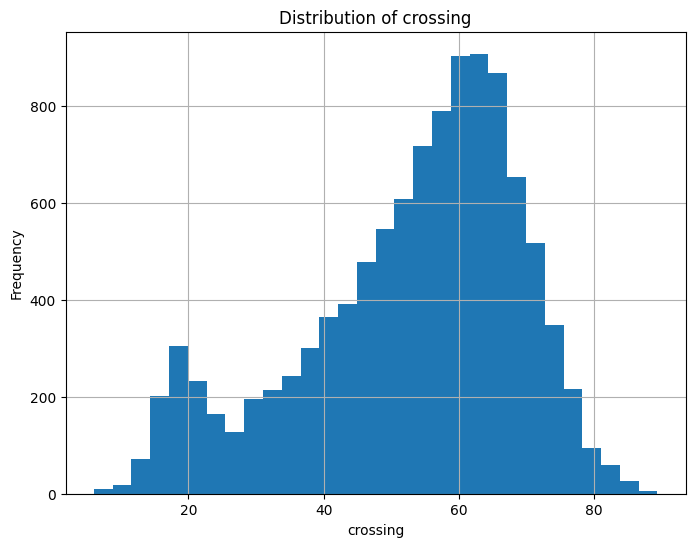

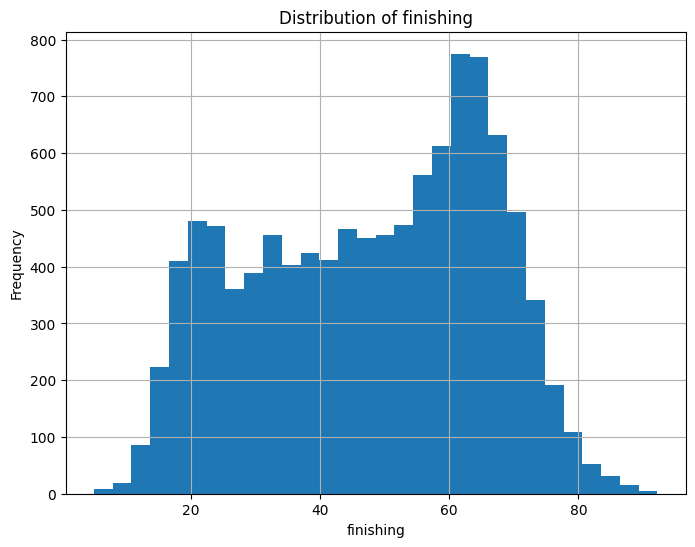

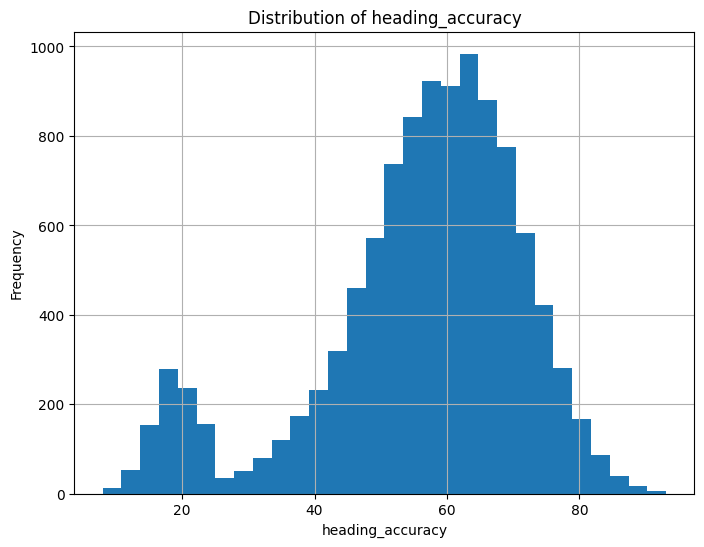

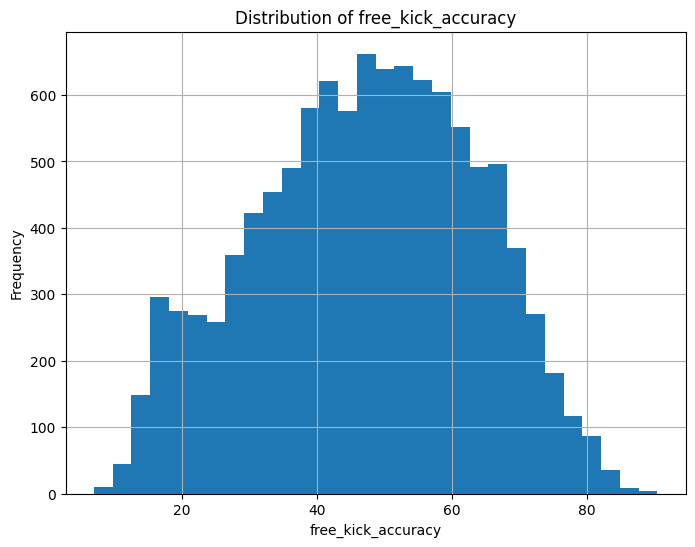

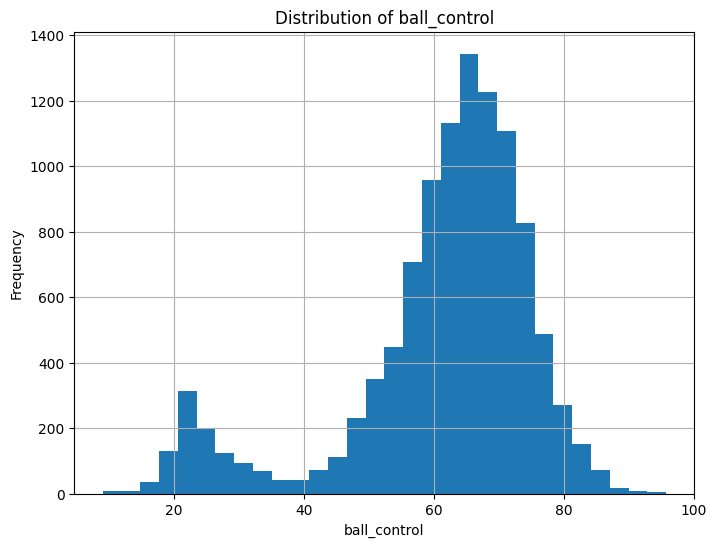

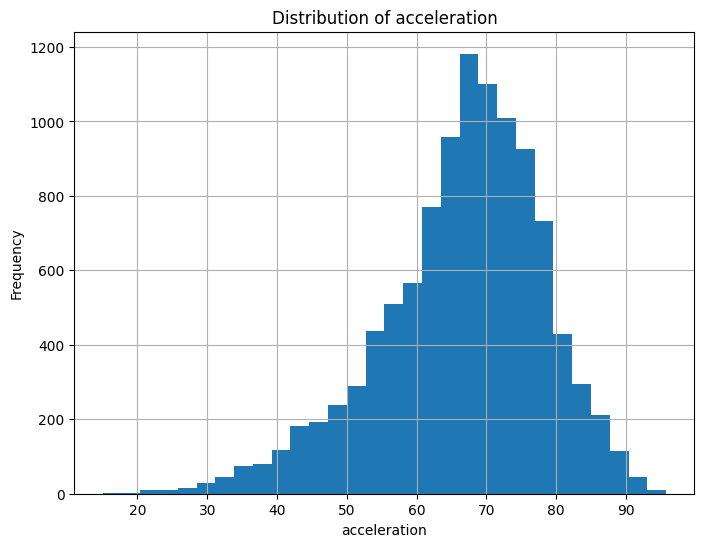

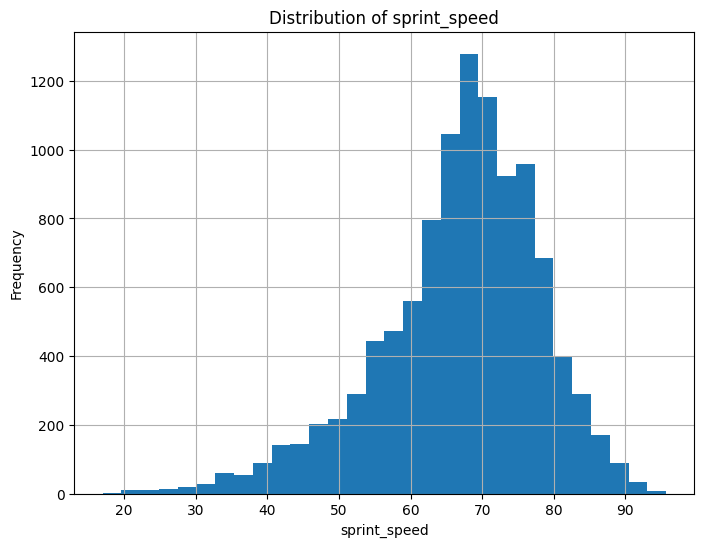

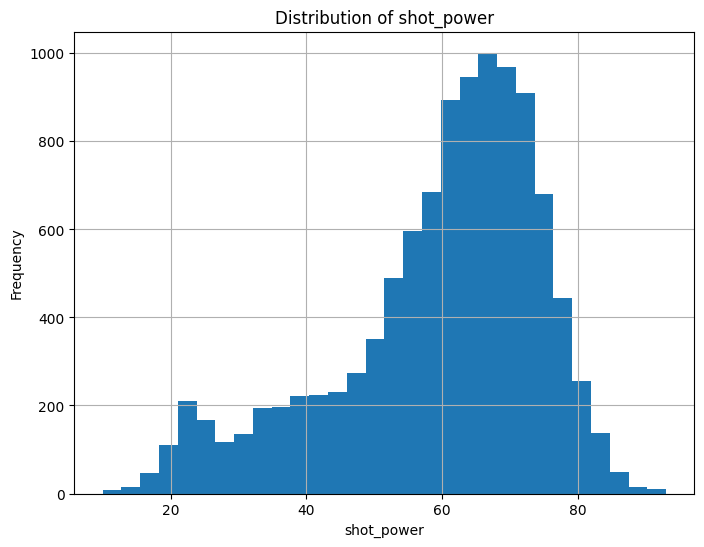

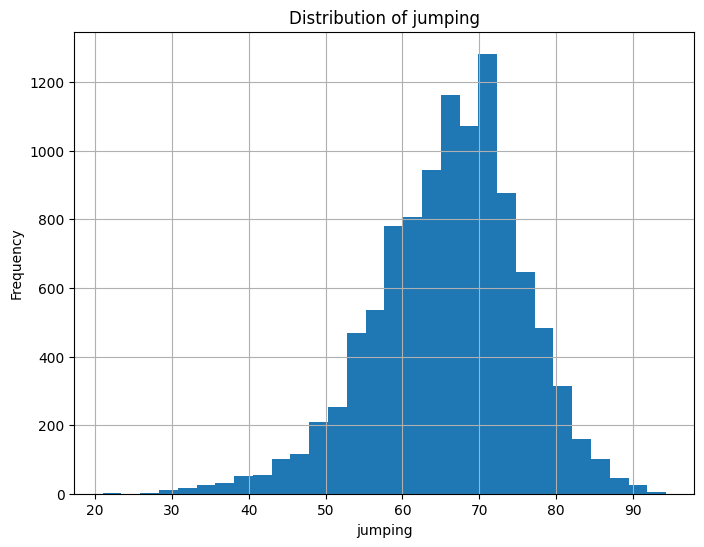

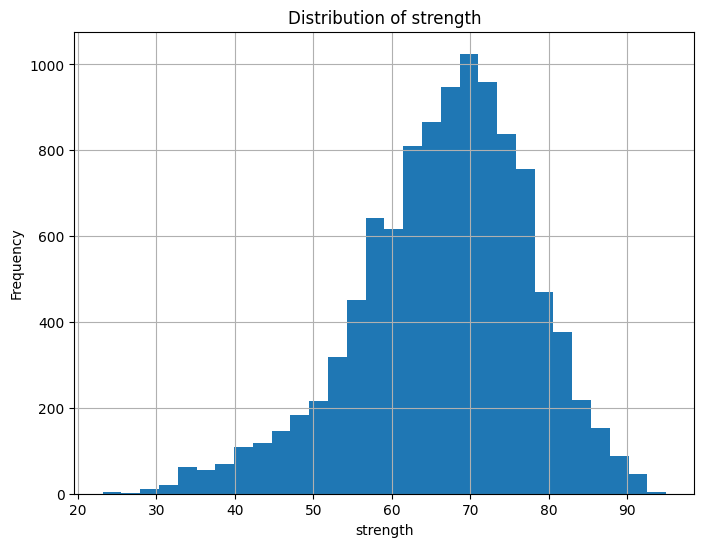

In [17]:
# prompt: plot a histogram for all numeric columns except player_api_id

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'grouped_df' is already defined as in the previous code

# Select numeric columns, excluding 'player_api_id'
numeric_cols = grouped_df.select_dtypes(include=['number']).columns
numeric_cols = numeric_cols.drop('player_api_id', errors='ignore')

# Create histograms for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    grouped_df[col].hist(bins=30)  # Adjust number of bins as needed
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

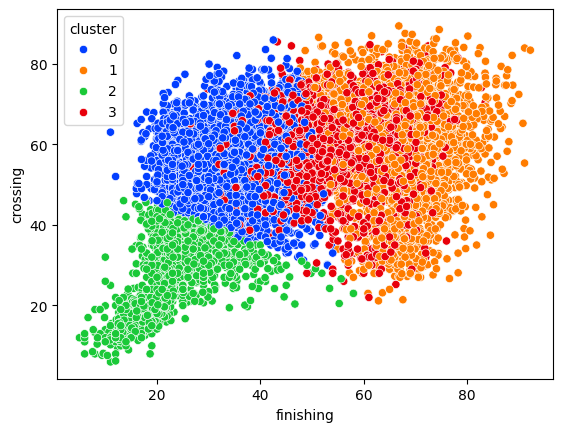

In [19]:
#Cluster the players based on features using kmeans
from sklearn.cluster import KMeans
import seaborn as sns
features = grouped_df[['finishing', 'crossing', 'strength']].fillna(0)
kmeans = KMeans(n_clusters=4, random_state=42)
grouped_df['cluster'] = kmeans.fit_predict(features)
sns.scatterplot(x='finishing', y='crossing', hue='cluster', data=grouped_df, palette='bright')
plt.show()


In [20]:
# Summarize attributes for each cluster
cluster_summary = grouped_df.groupby('cluster')['finishing'].mean()
print(cluster_summary)


cluster
0    36.360138
1    65.538207
2    22.002536
3    57.272075
Name: finishing, dtype: float64


In [21]:
# prompt: repeat the same for crossing and strength

# Summarize attributes for each cluster
cluster_summary_crossing = grouped_df.groupby('cluster')['crossing'].mean()
print(f'Cluster average for crossing: {cluster_summary_crossing}')

cluster_summary_strength = grouped_df.groupby('cluster')['strength'].mean()
print(f'Cluster average for strength: {cluster_summary_strength}')

Cluster average for crossing: cluster
0    55.431830
1    59.877309
2    25.268447
3    60.261512
Name: crossing, dtype: float64
Cluster average for strength: cluster
0    70.486498
1    71.298335
2    68.445280
3    53.054720
Name: strength, dtype: float64


In [23]:
# prompt: generate a dataframe to groupby all the numeric variables' average for each cluster

# Group numeric features by cluster and calculate the mean
numeric_cols = grouped_df.select_dtypes(include=['number']).columns
cluster_median = grouped_df.groupby('cluster')[numeric_cols].median()

cluster_median

,player_api_id,height,weight,overall_rating,potential,crossing,finishing,heading_accuracy,free_kick_accuracy,ball_control,acceleration,sprint_speed,shot_power,jumping,strength,cluster
cluster,,,,,,,,,,,,,,,,
0,106013.0,182.88,168.0,65.714286,70.950000,55.360000,36.695652,61.571429,44.133333,61.625000,66.2,66.857143,58.100000,68.368421,71.000000,0.0
1,45196.5,182.88,170.0,69.464115,73.888889,61.363757,65.666667,63.984848,56.986111,70.080128,71.0,71.371473,71.500000,68.000000,70.714286,1.0
2,111466.0,187.96,181.0,65.166667,70.600000,23.224747,21.000000,25.000000,22.714286,31.000000,52.0,53.026316,35.857860,66.964240,69.612040,2.0
3,177891.0,175.26,154.0,65.333333,71.857143,61.333333,57.866667,50.800000,55.000000,67.400000,74.2,72.769231,63.172414,62.192308,55.000000,3.0


In [31]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(grouped_df.drop(['player_name','player_api_id','preferred_foot'],axis=1), grouped_df['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.14319809479418139


The score denotes weak clustering

## Gaussian Mixture Model

Uses a mixture of Gaussian model to fit. It is a probabilistic model that assumes all data points are generated from a mixture of finite numbers. It is useful in clustering overlapping points; "to constrain the covariance of the difference classes estimated: spherical, diagonal, tied or full covariance."



In [32]:
features = ['crossing', 'finishing', 'ball_control', 'strength', 'sprint_speed', 'overall_rating']
clustering_data = grouped_df[features]


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)


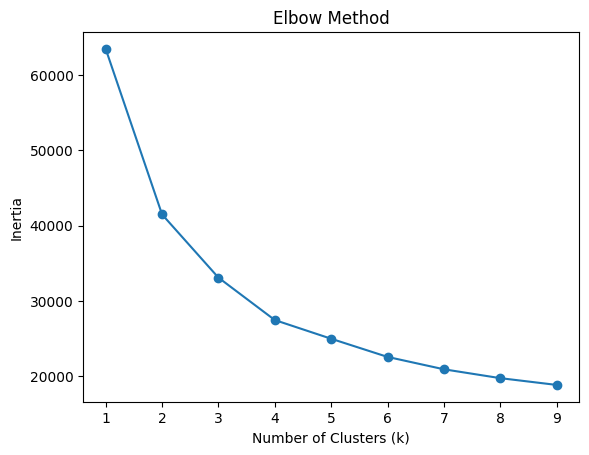

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [35]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4, random_state=42)
clustering_data['cluster'] = gmm.fit_predict(scaled_data)


<ipython-input-35-844869165bdf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data['cluster'] = gmm.fit_predict(scaled_data)


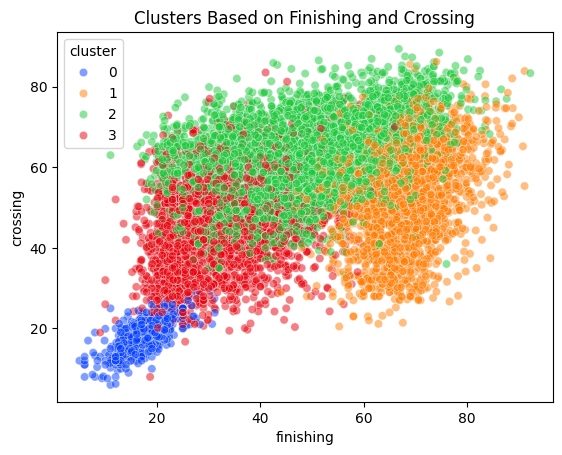

In [38]:
import seaborn as sns

sns.scatterplot(x=clustering_data['finishing'], y=clustering_data['crossing'], hue=clustering_data['cluster'], palette='bright',alpha = 0.5)
plt.title('Clusters Based on Finishing and Crossing')
plt.show()


Cluster 0 (Blue):

- Low finishing, low crossing: Likely represents defenders or goalkeepers:
- These players typically have minimal involvement in offensive actions like shooting or delivering crosses.
They focus more on defensive actions or goalkeeping duties.

Cluster 1 (Orange):

- High finishing, high crossing: Likely represents wingers.
These players are strong at delivering crosses into the box, which is crucial for wide players.
- Moderate finishing suggests they occasionally contribute to goal-scoring.
- High finishing coupled with high crossing does denote advanced midfielders who play closer to the opposition goal, combining creativity with goal-scoring prowess. For instance Egyptian player Mohamed Sabah (aka) Mo Salah at Liverpool FC.

Cluster 2 (Green):

- Moderate finishing, high crossing:
Likely represents central midfielders
- These players balance between offensive and defensive duties.
- High crossing and finishing suggest versatility but no specialised offensive role.

Cluster 3 (Red):

- Moderate finishing, low crossing: Focus on creating opportunities or taking shots from central areas; likely represents Central Attacking Midfielders (CAM).
- These players excel at converting chances into goals but are less involved in wide play or delivering crosses.
- Positioned centrally, where crossing is less critical.


**Team Formation**:
Use clusters to create balanced teams with players from different roles.
Example:
Strikers (Cluster 3), wingers (Cluster 1), midfielders (Cluster 2), and defenders (Cluster 0).

In [39]:

# Calculate Silhouette Score
silhouette_avg_2 = silhouette_score(clustering_data, clustering_data['cluster'])
print(f'Silhouette Score: {silhouette_avg_2}')

Silhouette Score: 0.18021939484773003


0.14 to 0.18:
This increase suggests that the clustering slightly improved:
Points are better assigned to their clusters compared to before.
The separation between clusters has improved.
However, 0.18 still indicates weak clustering, meaning:
Clusters are likely overlapping.
The dataset may lack clear, well-defined groupings.